In [4]:
#book keeping
import pandas as pd
from pandas import DataFrame, read_csv
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [5]:
# read in cvs, obtained from kaggle    https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking
Location = r'C:\Users\liamj\data.csv'
df = pd.read_csv(Location)
#raw data
df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [6]:
#data has column region, this seperates it by region 
spot=df.loc[df['Region'].isin(["global"])]
spot2=df.loc[df['Region'].isin(["us"])]
spot3=df.loc[df['Region'].isin(["fr"])]
spot4=df.loc[df['Region'].isin(["it"])]
spot5=df.loc[df['Region'].isin(["mx"])]
spot6=df.loc[df['Region'].isin(["ca"])]


In [7]:
#take the top 200 songs of each day and add them to get daily stream numbers for each country
spotgl=spot.groupby(['Date']).Streams.sum()
spotus=spot2.groupby(['Date']).Streams.sum()
spotfr=spot3.groupby(['Date']).Streams.sum()
spotit=spot4.groupby(['Date']).Streams.sum()
spotmx=spot5.groupby(['Date']).Streams.sum()
spotca=spot6.groupby(['Date']).Streams.sum()



In [8]:
#daily streams for US
spotus

Date
2017-01-01    55139058
2017-01-02    48894824
2017-01-03    55168814
2017-01-04    55939894
2017-01-05    56235124
2017-01-06    59503480
2017-01-07    54059621
2017-01-08    51041199
2017-01-09    56164563
2017-01-10    58331512
2017-01-11    59651693
2017-01-12    61089468
2017-01-13    64350270
2017-01-14    60144577
2017-01-15    55471155
2017-01-16    58120310
2017-01-17    60334233
2017-01-18    61126580
2017-01-19    61443449
2017-01-20    62270788
2017-01-21    59271179
2017-01-22    54045809
2017-01-23    56944560
2017-01-24    59797522
2017-01-25    60682755
2017-01-26    61834728
2017-01-27    67869691
2017-01-28    63510516
2017-01-29    56969301
2017-01-30    60298890
                ...   
2017-12-11    71587944
2017-12-12    74799141
2017-12-13    74486114
2017-12-14    74848940
2017-12-15    81951623
2017-12-16    77425591
2017-12-17    68280546
2017-12-18    73333719
2017-12-19    75411081
2017-12-20    75651806
2017-12-21    76117683
2017-12-22    86676763
2017-1

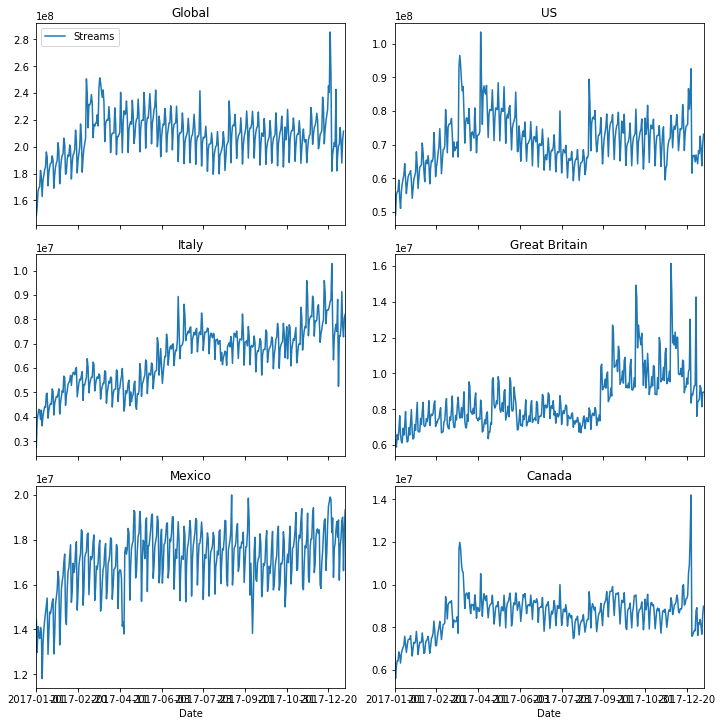

In [9]:
# 6 subplots to show streams on y axis x for date
fig, ((ax1, ax2), (ax3, ax4) ,(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=False, figsize=(10,10))


spotgl.plot(x='Date', y='Streams', legend=True, ax=ax1)
ax1.set_title("Global")

spotus.plot(x='Date', y='Streams', legend=False, ax=ax2)
ax2.set_title("US")

spotit.plot(x='Date', y='Streams', legend=False, ax=ax3)
ax3.set_title("Italy")

spotfr.plot(x='Date', y='Streams', legend=False, ax=ax4)
ax4.set_title("Great Britain")

spotmx.plot(x='Date', y='Streams', legend=False, ax=ax5)
ax5.set_title("Mexico")

spotca.plot(x='Date', y='Streams', legend=False, ax=ax6)
ax6.set_title("Canada")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [10]:
#data has column row, this seperates it by region (different countries)
#spot7=df.loc[df['Region'].isin(["global"])]
spot8=df.loc[df['Region'].isin(["br"])]
spot9=df.loc[df['Region'].isin(["ch"])]
spot10=df.loc[df['Region'].isin(["id"])]
spot11=df.loc[df['Region'].isin(["sk"])]
spot12=df.loc[df['Region'].isin(["jp"])]

In [11]:
#take the top 200 songs of each day and add them to get daily stream numbers for each country 
#spotgl=spot7.groupby(['Date']).Streams.sum()
spotbz=spot8.groupby(['Date']).Streams.sum()
spotch=spot9.groupby(['Date']).Streams.sum()
spotin=spot10.groupby(['Date']).Streams.sum()
spotsk=spot11.groupby(['Date']).Streams.sum()
spotjp=spot12.groupby(['Date']).Streams.sum()

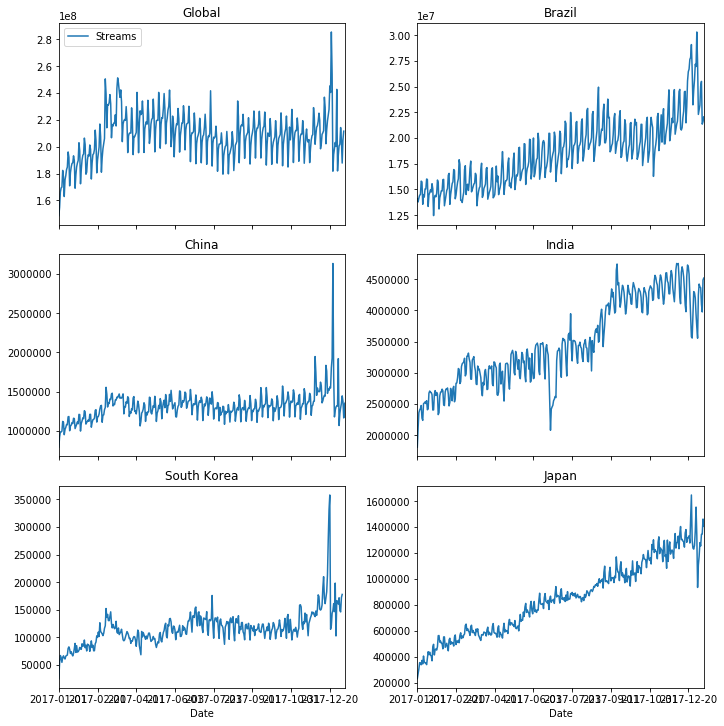

In [13]:
# 6 subplots to show streams on y axis x for date
fig, ((ax1, ax2), (ax3, ax4) ,(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=False, figsize=(10,10))


spotgl.plot(x='Date', y='Streams', legend=True, ax=ax1)
ax1.set_title("Global")

spotbz.plot(x='Date', y='Streams', legend=False, ax=ax2)
ax2.set_title("Brazil")

spotch.plot(x='Date', y='Streams', legend=False, ax=ax3)
ax3.set_title("China")

spotin.plot(x='Date', y='Streams', legend=False, ax=ax4)
ax4.set_title("India")

spotsk.plot(x='Date', y='Streams', legend=False, ax=ax5)
ax5.set_title("South Korea")

spotjp.plot(x='Date', y='Streams', legend=False, ax=ax6)
ax6.set_title("Japan")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [24]:
#reset data just in case
Location = r'C:\Users\liamj\data.csv'
df = pd.read_csv(Location)
spotv = pd.DataFrame(df)
spotv=spotv.groupby([ 'Region']).Streams.sum()
#yearly streams by country
spotv

Region
ar         2776971684
at          344322232
au         3372128479
be          556799739
bo           97248182
br         6890194505
ca         3201208648
ch          487115409
cl         2191334779
co          834076562
cr          362874962
cz          208602150
de         6072757512
dk         1509648808
do          154057176
ec          318441639
ee           21653223
es         3754247012
fi         1246077272
fr         3146285237
gb         7185860296
global    76852243776
gr           58780418
gt          176974407
hk          295800351
hn           91375818
hu          152772228
id         1287300250
ie          648164942
is           80100254
it         2387015412
jp          315926822
lt           30363701
lu            6018470
lv           33654223
mx         6344670992
my          652284423
nl         3467630881
no         2011024798
nz          813211531
pa          131475020
pe         1079068853
ph         3320833608
pl          785350179
pt          441238052
py 

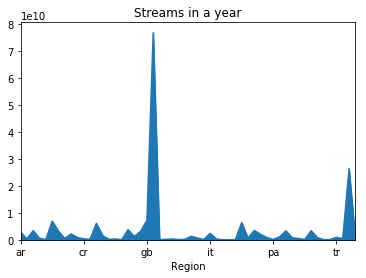

In [25]:
#volume plot with global for scale
spotv.plot(kind = 'area', title= 'Streams in a year')

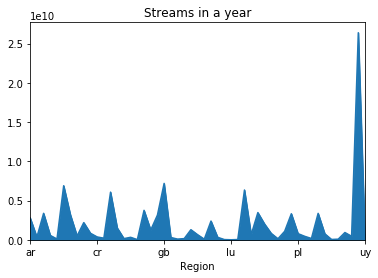

In [22]:
spotv = spotv.drop(spotv.index[[21]])
spotv.plot(kind = 'area' , title= 'Streams in a year')

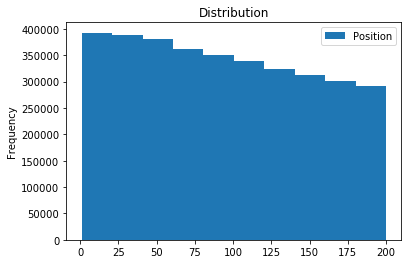

In [21]:
df.plot(x='Streams', kind = 'hist', legend=True, title = 'Distribution')